# Random Forest Classification for Twitter Bot Account Detection

## Import libraries

In [1005]:
import pandas as pd # to manipulate and use our data from dataset.csv
import shap # explains the importance of features in our model
from sklearn.model_selection import train_test_split # splits our data into model testing and model training 
from sklearn.ensemble import RandomForestClassifier # implements the Random Forest Classifier algorithm for model training
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # metrics to assess performance of our model

## Load Our Dataset

In [1006]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,NaN,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


In [1007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         2064 non-null   int64  
 1   screen_name                     2064 non-null   object 
 2   is_bot                          2064 non-null   int64  
 3   account_age                     2064 non-null   int64  
 4   is_blue_verified                2064 non-null   int64  
 5   is_verified                     2064 non-null   int64  
 6   profile_description_sentiment   1623 non-null   float64
 7   following_count                 2064 non-null   int64  
 8   followers_count                 2064 non-null   int64  
 9   following_to_followers          2064 non-null   float64
 10  is_possibly_sensitive           2064 non-null   int64  
 11  is_default_profile_image        2064 non-null   int64  
 12  is_profile_banner               20

## Feature Engineering

### Replace null values with a zero

In [1008]:
df.isnull().sum()

user_id                             0
screen_name                         0
is_bot                              0
account_age                         0
is_blue_verified                    0
is_verified                         0
profile_description_sentiment     441
following_count                     0
followers_count                     0
following_to_followers              0
is_possibly_sensitive               0
is_default_profile_image            0
is_profile_banner                   0
is_profile_image_valid              0
tweet_freq                          0
parsed_owned_tweets_count           0
parsed_owned_text_tweets_count      0
parsed_retweets_count               0
likes_freq                          0
media_freq                          0
followers_freq                      0
following_freq                      0
replies_to_owned                    0
quotes_to_owned                     0
retweets_to_owned                   0
avg_urls                            0
avg_hashtags

In [1009]:
df.fillna(0, inplace=True)

In [1010]:
df.isnull().sum()

user_id                           0
screen_name                       0
is_bot                            0
account_age                       0
is_blue_verified                  0
is_verified                       0
profile_description_sentiment     0
following_count                   0
followers_count                   0
following_to_followers            0
is_possibly_sensitive             0
is_default_profile_image          0
is_profile_banner                 0
is_profile_image_valid            0
tweet_freq                        0
parsed_owned_tweets_count         0
parsed_owned_text_tweets_count    0
parsed_retweets_count             0
likes_freq                        0
media_freq                        0
followers_freq                    0
following_freq                    0
replies_to_owned                  0
quotes_to_owned                   0
retweets_to_owned                 0
avg_urls                          0
avg_hashtags                      0
identical_tweet_freq        

In [1011]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1217628182611927040,boazbaraktcs,0,1778,1,0,0.000,459,18538,0.025,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,36741729,Matthew_Brody,1,5690,0,0,0.000,615,456,1.349,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1679822588,GrianMC,1,4119,0,0,0.000,274,282752,0.001,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,1519144464,NikhilSewdass,0,4183,0,0,0.933,409,191,2.141,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,15211869,jamie_love,0,6001,1,0,0.000,2616,11106,0.236,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


### Drop irrelevent values to training

We want to drop user_id and screen_name as those are irrelevant to bot status. All the parsed_ features are used for calculations of other features. 

In [1012]:
df.drop(columns=['user_id', 'screen_name', 'parsed_owned_tweets_count', 'parsed_owned_text_tweets_count', 'parsed_retweets_count'], inplace=True)

In [1013]:
df.head()

,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,0,1778,1,0,0.000,459,18538,0.025,0,0,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,1,5690,0,0,0.000,615,456,1.349,0,0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,1,4119,0,0,0.000,274,282752,0.001,0,0,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,0,4183,0,0,0.933,409,191,2.141,0,0,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,0,6001,1,0,0.000,2616,11106,0.236,0,0,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


## Isolate and Drop Target Variable

The target variable is what we are trying to predict. In this case is_bot. We want to drop it to ensure the model is trained on input variables and not outcomes.

In [1014]:
Y = df.is_bot
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: is_bot, dtype: int64

In [1015]:
df.drop('is_bot', inplace=True, axis=1)

In [1016]:
df.head()

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0,0.000,459,18538,0.025,0,0,1,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,5690,0,0,0.000,615,456,1.349,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,4119,0,0,0.000,274,282752,0.001,0,0,1,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,4183,0,0,0.933,409,191,2.141,0,0,1,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,6001,1,0,0.000,2616,11106,0.236,0,0,1,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


Now we are just saving the new df without is_bot to X

In [1017]:
X = df

In [1018]:
X

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0,0.000,459,18538,0.025,0,0,1,...,0.000,0.865,1.404,0.250,0.000,0.000,0.215,0.083,1.880,0.121
1,5690,0,0,0.000,615,456,1.349,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,4119,0,0,0.000,274,282752,0.001,0,0,1,...,0.009,0.162,0.126,0.189,0.027,0.000,0.306,0.152,3.484,0.111
3,4183,0,0,0.933,409,191,2.141,0,0,1,...,0.000,0.500,30.250,0.000,0.500,0.000,-0.403,1.309,3.927,1.309
4,6001,1,0,0.000,2616,11106,0.236,0,0,1,...,0.000,0.151,0.453,0.442,0.000,0.000,-0.136,0.089,0.353,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,1361,0,0,0.896,769,98,7.847,0,0,0,...,0.000,0.000,0.000,0.400,4.600,0.000,0.684,0.000,6.122,4.082
2060,4124,0,0,0.000,2486,185,13.438,0,0,1,...,0.000,0.200,24.000,0.400,0.000,0.000,0.189,0.000,12.973,0.000
2061,4662,0,0,0.000,692,317,2.183,0,0,1,...,0.000,0.133,3.167,0.333,0.567,0.001,0.052,1.157,7.256,1.157
2062,1671,0,0,0.000,184,6,30.667,0,0,1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Split Data into Test and Training Sets

In [1019]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

This sets of data are randomly selected. 70% will go into training and 30% will go into testing. Random state is used to produce the same random outcome.

In [1020]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (1444, 26)
X_test:  (620, 26)
Y_train:  (1444,)
Y_test:  (620,)


## Training Random Forest Classification on Training Set

In [1021]:
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
model.fit(X_train.values, Y_train.values)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

criterion: How the decision trees are splitting nodes. either 'gini' or 'entropy'.  
n_estimators: The number of decision trees in the forest. we want ~100.  
max_samples: How many rows are being considered in each decision tree. We want all of them, leave empty.  

## Predicting Test Results

In [1022]:
y_pred = model.predict(X_test.values)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

## Confusion Matrix

In [1023]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[206 100]
 [ 73 241]]


confusion matrix tells us the results of the testing  

[0][0]: True Negative - Correctly predicted human account  
[0][1]: False Negative - Incorrectly predicted human account   
[1][0]: False Positive - Incorrectly predicted bot account  
[1][1]: True Positive - Correctly predicted bot account  

In [1024]:
round(accuracy_score(Y_test, y_pred), 3)

0.721

In [1025]:
report = classification_report(Y_test, y_pred, output_dict=True)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       306
           1       0.71      0.77      0.74       314

    accuracy                           0.72       620
   macro avg       0.72      0.72      0.72       620
weighted avg       0.72      0.72      0.72       620



In [1026]:
print(f"""
Key Results:

Precision:
- {report["0"]["precision"] * 100:.2f}% of the predictions that were humans were actually humans.
- {report["1"]["precision"] * 100:.2f}% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified {report["0"]["recall"] * 100:.2f}% of humans.
- The model correctly identified {report["1"]["recall"] * 100:.2f}% of bots.

F1 Score:
- Humans: {report["0"]["f1-score"]:.2f}
- Bots: {report["1"]["f1-score"]:.2f}

Support:
- Humans: {report["0"]["support"]} instances in the test set.
- Bots: {report["1"]["support"]} instances in the test set.
""")


Key Results:

Precision:
- 73.84% of the predictions that were humans were actually humans.
- 70.67% of the predictions that were bots were actually bots.

Recall:
- The model correctly identified 67.32% of humans.
- The model correctly identified 76.75% of bots.

F1 Score:
- Humans: 0.70
- Bots: 0.74

Support:
- Humans: 306.0 instances in the test set.
- Bots: 314.0 instances in the test set.



## Use SHAP to Interpret Feature Importance

In [975]:
explainer = shap.TreeExplainer(model)

In [976]:
shap_values = explainer.shap_values(X_test)

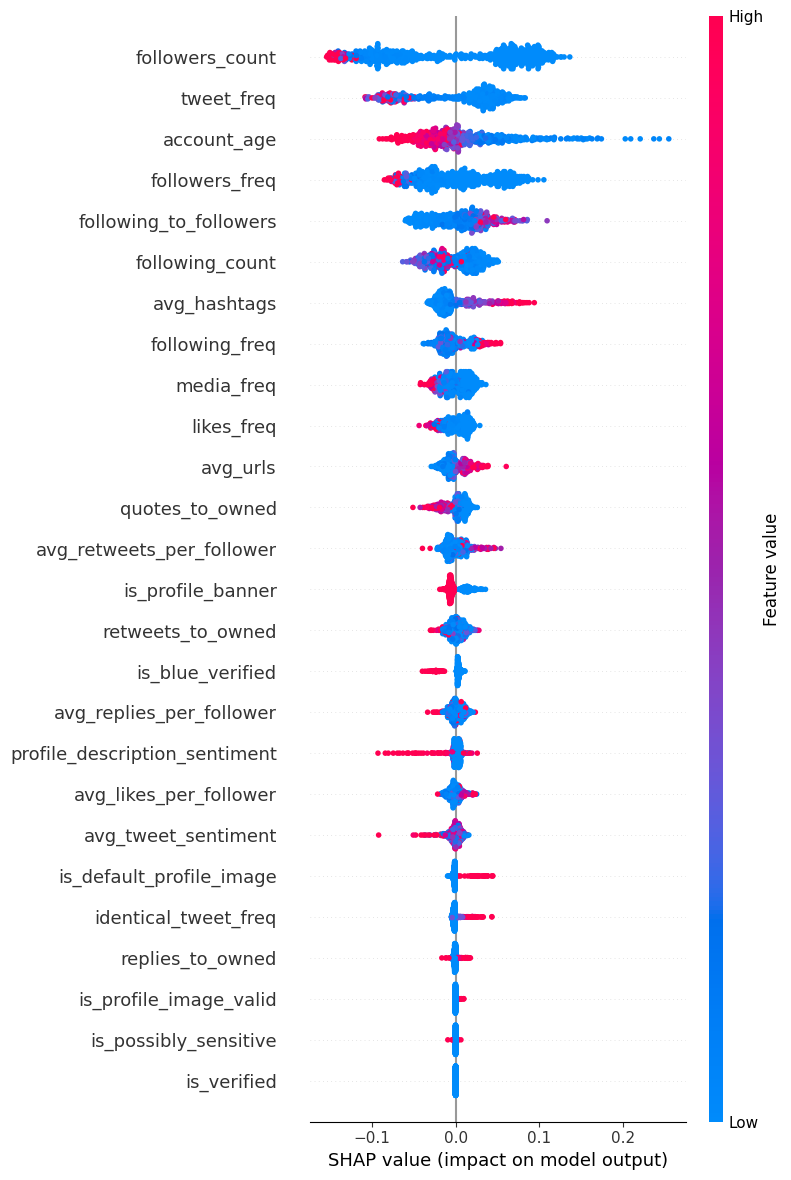

In [977]:
shap.summary_plot(shap_values[:,:,1], X_test, max_display=X_test.shape[1])

This summary plot tells us a few things:  

- Features higher on the list (e.g. followers_count, tweet_freq) are the more important features for the model's prediction.
- The SHAP value of an indivdual point tells us in which direction is the value pointing the model towards (positive values towards a bot, negative values towards a human).
- The color of an individual point tells us the actual value of the point. For example, account_age has a few blue points shifted right meaning that users with a low account age are pushing the model to predict it as a bot.

From the summary plots, we learn that the following aren't having a significant impact:  
- is_verified
- is_possibly_sensitive
- is_profile_image_valid

We can drop these values.  

## Feature Engineering - 2

### Drop More Insignificant Feautres

In [978]:
X.drop(columns=['is_verified'], inplace=True)

In [979]:
X.head()

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers,is_possibly_sensitive,is_default_profile_image,is_profile_banner,is_profile_image_valid,...,replies_to_owned,quotes_to_owned,retweets_to_owned,avg_urls,avg_hashtags,identical_tweet_freq,avg_tweet_sentiment,avg_replies_per_follower,avg_likes_per_follower,avg_retweets_per_follower
0,1778,1,0.000,459,18538,0.025,0,0,1,0,...,0.000,0.865,1.404,0.250,0.000,0.0,0.215,0.083,1.880,0.121
1,5690,0,0.000,615,456,1.349,0,0,1,0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,4119,0,0.000,274,282752,0.001,0,0,1,0,...,0.009,0.162,0.126,0.189,0.027,0.0,0.306,0.152,3.484,0.111
3,4183,0,0.933,409,191,2.141,0,0,1,0,...,0.000,0.500,30.250,0.000,0.500,0.0,-0.403,1.309,3.927,1.309
4,6001,1,0.000,2616,11106,0.236,0,0,1,0,...,0.000,0.151,0.453,0.442,0.000,0.0,-0.136,0.089,0.353,0.177


## Retrain Model

In [981]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model.fit(X_train.values, Y_train.values)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

## Test Results

In [982]:
y_pred = model.predict(X_test.values)
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n', cm)
print('Accuracy Score: ', round(accuracy_score(Y_test, y_pred), 3))
print('Classification Report: \n', classification_report(Y_test, y_pred))

Confusion Matrix: 
 [[208  98]
 [ 65 249]]
Accuracy Score:  0.737
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       306
           1       0.72      0.79      0.75       314

    accuracy                           0.74       620
   macro avg       0.74      0.74      0.74       620
weighted avg       0.74      0.74      0.74       620



## Save Model

In [834]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

## Load Model and Test User

In [835]:
loaded_model = joblib.load('model.joblib')
user = X_test.iloc[0]
user

account_age                      2330.000
is_blue_verified                    0.000
profile_description_sentiment       0.000
following_count                   437.000
followers_count                    52.000
following_to_followers              8.404
is_default_profile_image            0.000
is_profile_banner                   0.000
tweet_freq                          0.113
likes_freq                          0.003
media_freq                          0.002
followers_freq                      0.022
following_freq                      0.188
quotes_to_owned                     0.875
retweets_to_owned                  14.625
avg_urls                            0.000
avg_hashtags                        0.000
identical_tweet_freq                0.000
avg_tweet_sentiment                 0.205
avg_replies_per_follower            0.000
avg_likes_per_follower             16.827
avg_retweets_per_follower           0.000
Name: 811, dtype: float64

## Make Predicition

In [610]:
prediction = loaded_model.predict([user])
probabilities = loaded_model.predict_proba([user])

In [611]:
print(f'Prediction: {prediction}')
print(f'Probabilities: {probabilities}')

Prediction: [1]
Probabilities: [[0.47 0.53]]


This tells us that the model predicted is_bot = 0, with a 95.5% probability.

## Obtain Information About Result

In [648]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(user)

In [649]:
feature_names = X_test.columns.tolist() 
feature_contributions = list(zip(feature_names, shap_values[:, 0 if prediction[0] == 0 else 1]))
feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)
print(f"Feature Contributions: ")
for feature, contribution in feature_contributions:
    print(f"{feature}: {contribution}")

Feature Contributions: 
tweet_freq: 0.05373562445961818
following_to_followers: 0.0485809015174449
account_age: -0.042898187687281465
followers_count: -0.03825071570471684
following_count: 0.03663289538971023
following_freq: 0.02761901335991589
avg_hashtags: -0.023025302639437178
retweets_to_owned: 0.020662392962362944
quotes_to_owned: 0.01659503725482102
is_profile_banner: 0.014448619479532404
media_freq: 0.012760011422463764
followers_freq: -0.011811309179077334
avg_likes_per_follower: -0.009890311995922232
avg_tweet_sentiment: -0.0075789938707011475
avg_replies_per_follower: -0.007493719910225516
avg_urls: -0.006928962293407287
avg_retweets_per_follower: -0.004610142994303163
likes_freq: 0.0041953770959429594
is_default_profile_image: -0.003688887162496048
profile_description_sentiment: 0.002076696503364355
identical_tweet_freq: -0.001263654788329262
is_profile_image_valid: -0.0007200912109407301
is_blue_verified: -0.0004757910188591289
is_possibly_sensitive: -8.560598298640658e-05


This tells us the user features (in order of importance) that contributed most heavily towards being the result. Positive equals pushes the model toward the result class, negative pushes the model away from the result class.

We just want to get the top three features to display on our app.

## Get Top Three User Features

In [615]:
top_features = {feature: user[feature] for feature, _ in feature_contributions[:3]}
top_features

{'followers_count': np.float64(482.0),
 'account_age': np.float64(4672.0),
 'followers_freq': np.float64(0.103)}

## Return All Statistics Needed

In [651]:
stats = {'prediction': 'human' if prediction[0] == 0 else 'bot', 'probability': float(probabilities[0][0]) if prediction[0] == 0 else float(probabilities[0][1]), 'top_features': top_features}
stats

{'prediction': 'bot',
 'probability': 0.53,
 'top_features': {'followers_count': np.float64(482.0),
  'account_age': np.float64(4672.0),
  'followers_freq': np.float64(0.103)}}